## La Curse of Dimensionality (ou malédiction de la dimensionnalité)
 - fait référence à une série de problèmes qui surviennent lorsque l'on travaille avec des données de très haute dimension. Voici une explication simple :


- Si on travaille avec 2 dimensions (par exemple, longueur et largeur), c’est facile de visualiser et de comprendre.
- Mais si on rajoute de plus en plus de dimensions (3, 4, 5, voire plus), l’espace dans lequel on travaille devient de plus en plus grand.

### Problème : les données deviennent trop dispersées
Plus il y a de dimensions, plus l’espace augmente vite, ce qui rend les données très "diluées".
Cela signifie que les points de données sont très éloignés les uns des autres, ce qui rend plus difficile de trouver des modèles, des regroupements ou des relations entre eux.
### Conséquences :
- Données insuffisantes : Pour obtenir des résultats fiables dans un espace de haute dimension, il faut de plus en plus de données. En fait, la quantité de données nécessaires augmente exponentiellement avec le nombre de dimensions. Cela peut vite devenir impossible à gérer.

- Détection de similitudes difficile : En général, pour organiser les données, on cherche des objets similaires qui se regroupent. Mais en haute dimension, tout semble éloigné et différent, ce qui rend l’organisation inefficace.

----

### Use Case: MNIST dataset 

Dans ce notebook, nous résumons les méthodes de réduction de dimension qui permettent d'interpréter les données de manière plus intuitive en réduisant les caractéristiques à travers la diminution des dimensions de caractéristiques multidimensionnelles.

Le jeu de données utilise le jeu de données MNIST, couramment utilisé. Le jeu de données MNIST que nous utilisons généralement a une taille de 28 x 28. En examinant ce jeu de données à travers la réduction de dimension, nous allons vérifier s'il existe une régularité et comment les étiquettes sont regroupées selon chaque méthode de réduction de dimension.

## Importation des librairies et le jeux de donnée

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from keras.datasets import mnist
(train_x, train_y), (test_x, test_y) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [4]:
# Reshape to 2D data
train_x = train_x.reshape(train_x.shape[0], -1)
print(train_x.shape)

sample_size = 5000
# Use only the top 1000 data for training
train_x = pd.DataFrame(train_x[:sample_size, :])
train_y = train_y[:sample_size]

(60000, 784)


### PCA (Analyse en Composantes Principales)

- L'Analyse en Composantes Principales (PCA) est la méthode de réduction de dimension la plus représentative. Il s'agit d'une méthode qui permet de réorienter des données multidimensionnelles dans la direction de la plus grande variance. En d'autres termes, PCA cherche à identifier les axes (ou composantes principales) qui maximisent la variance des données, ce qui permet de capturer autant d'information que possible tout en réduisant le nombre de dimensions.

- Plus la dépendance entre les variables est forte, plus le nombre de composantes principales nécessaires pour représenter fidèlement les données d'origine peut être réduit. En effet, si certaines variables sont fortement corrélées, elles peuvent être combinées en une seule composante principale.

- Cependant, une limitation importante de la PCA est qu'elle suppose que chaque caractéristique suit une distribution normale. Par conséquent, il n'est pas approprié d'appliquer la PCA à des variables dont la distribution est déformée ou non normale. Dans de tels cas, les résultats de la PCA pourraient ne pas refléter correctement la structure sous-jacente des données.

<img src="img/PCA.png"/>

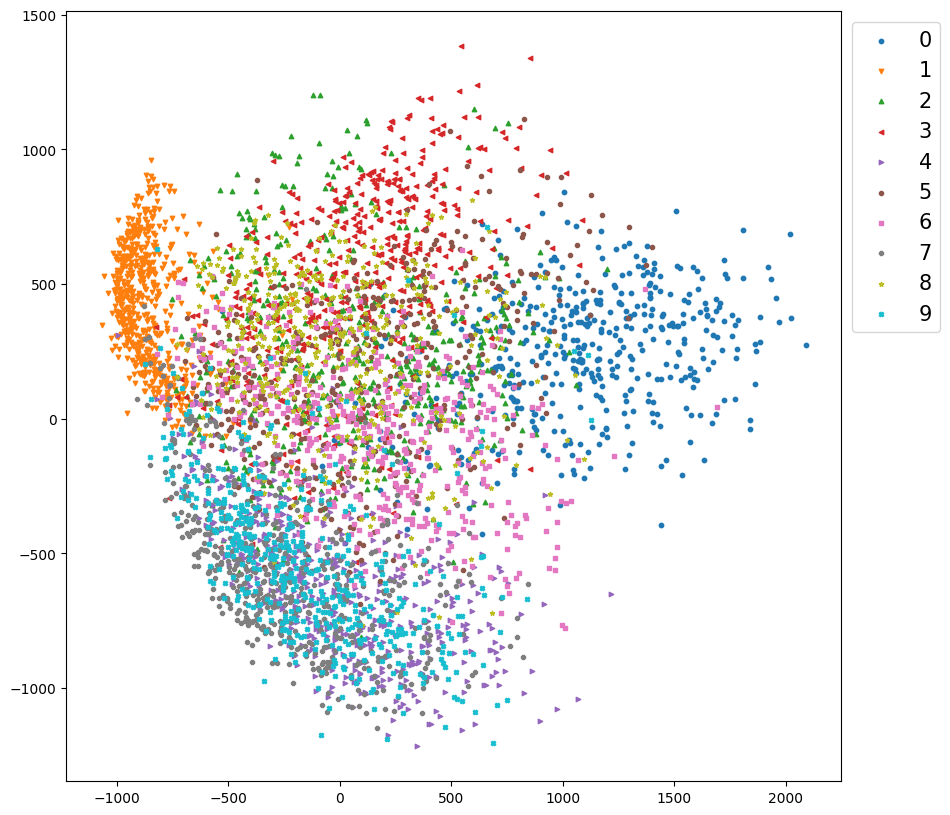

In [8]:
from sklearn.decomposition import PCA

pca = PCA()
x_pca = pca.fit_transform(train_x)
markers=['o','v','^','<','>','8','s','P','*','X']
# plot in 2D by class
plt.figure(figsize=(10,10))
for i,marker in enumerate(markers):
    mask = train_y == i
    plt.scatter(x_pca[mask, 0], x_pca[mask, 1], label=i, s=10, alpha=1,marker=marker)
plt.legend(bbox_to_anchor=(1.00, 1), loc='upper left',fontsize=15)

## Analysis

1. **Réduction de dimensionnalité avec PCA** :
   - Le **PCA** a projeté les données originales (qui étaient de dimension 784, correspondant aux 28x28 pixels des images) dans un espace à **2 dimensions**.
   - Le but est de capturer la **variance** des données dans les deux premières composantes principales, ce qui permet de visualiser les données tout en conservant le plus d'information possible.

2. **Couleurs et marqueurs** :
   - Chaque point représente une image d'un chiffre (de 0 à 9).
   - Les **couleurs** et les **différents marqueurs** correspondent à chaque **classe de chiffre** (par exemple, les points bleus représentent les 0, les points oranges les 1, etc.).
   - Dans la légende à droite, on voit l'association entre les couleurs et les chiffres correspondants (de 0 à 9).

3. **Séparation des classes** :
   - On peut observer que certaines classes de chiffres sont mieux **séparées** que d'autres dans l'espace 2D. Par exemple :
     - Les **1 (orange)** forment un groupe assez distinct, relativement séparé des autres chiffres.
     - Les **0 (bleu)** sont également bien regroupés, mais certains points commencent à se mélanger avec d'autres classes, comme les 9 (cyan).
     - D’autres classes comme les **5 (violet clair)**, **6 (rose)**, et **7 (gris)** sont plus **mélangées** dans l’espace, ce qui signifie que les deux premières composantes principales ne parviennent pas à bien les distinguer.

4. **Regroupement des points** :
   - Les chiffres qui sont plus difficiles à distinguer visuellement (par exemple, les 3 et les 5, ou les 4 et les 9) se trouvent **plus proches** les uns des autres, ce qui rend leur séparation plus difficile après PCA.
   - Les **classes proches** dans l’espace 2D montrent qu'il peut y avoir des **similarités visuelles** entre ces chiffres manuscrits, ce qui peut expliquer pourquoi PCA ne les sépare pas bien.

### En résumé :
- Le graphique montre comment les **chiffres manuscrits** (données MNIST) sont distribués après avoir été projetés en 2D avec PCA.
- Bien que certaines classes de chiffres soient bien séparées (comme les 1 et les 0), d'autres sont plus difficiles à distinguer dans cet espace réduit, ce qui pourrait signifier que le PCA n'a pas capturé toute la complexité des données dans ces deux premières dimensions.
- Ce type de visualisation est utile pour voir la **structure globale** des données et identifier les zones où des classes de chiffres se chevauchent, ce qui pourrait indiquer un défi pour la classification automatique.

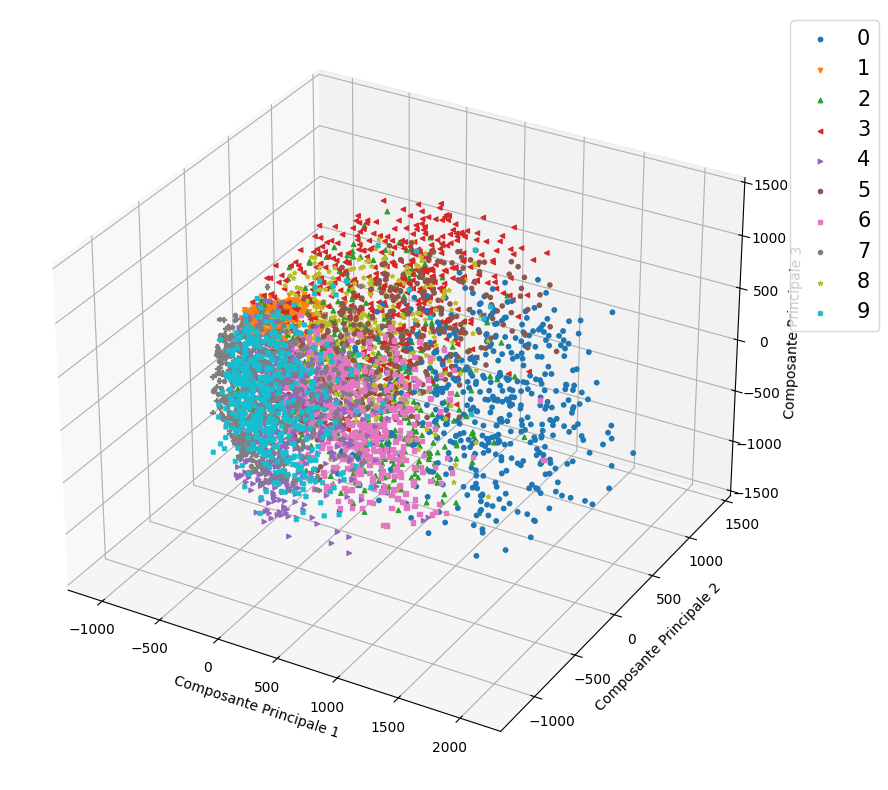

In [9]:
# Appliquer PCA pour réduire les données à 3 dimensions
pca = PCA(n_components=3)  # Spécifier 3 composantes principales
x_pca = pca.fit_transform(train_x)

# Visualiser en 3D
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# Définir les différents marqueurs pour chaque chiffre
markers = ['o', 'v', '^', '<', '>', '8', 's', 'P', '*', 'X']

# Plotter les données projetées dans les 3 composantes principales
for i, marker in enumerate(markers):
    mask = train_y == i
    ax.scatter(x_pca[mask, 0], x_pca[mask, 1], x_pca[mask, 2], 
               label=i, s=10, alpha=1, marker=marker)

# Ajouter la légende et les labels
ax.set_xlabel('Composante Principale 1')
ax.set_ylabel('Composante Principale 2')
ax.set_zlabel('Composante Principale 3')
plt.legend(bbox_to_anchor=(1.00, 1), loc='upper left', fontsize=15)
plt.show()

### LDA (Analyse Discriminante Linéaire)

L'Analyse Discriminante Linéaire (LDA) est une méthode de réduction de dimension spécifiquement utilisée dans le cadre de problèmes de **classification en apprentissage supervisé**. Contrairement à d'autres techniques de réduction de dimension, LDA cherche à maximiser la séparabilité entre les différentes classes présentes dans les données. Voici une explication détaillée de LDA :

#### 1. **Objectif de LDA**
   - **Pourquoi ?** : L'objectif principal de LDA est de trouver un espace de caractéristiques de faible dimension qui permet de classer efficacement les données d'entraînement. En d'autres termes, LDA cherche à transformer les données de manière à ce que les différentes classes soient mieux séparées dans l'espace réduit.
   - **Exemple** : Si nous avons des données sur des fleurs avec des caractéristiques comme la longueur et la largeur des pétales, LDA va chercher à projeter ces données dans un espace où les différentes espèces de fleurs sont bien distinctes.

#### 2. **Calcul des Matrices de Covariance**
   - LDA calcule deux types de matrices de covariance :
     - **Matrice de covariance entre classes** (ou matrice interclasse) : Cette matrice mesure la variance entre les différentes classes. Plus cette variance est grande, mieux les classes sont séparées.
     - **Matrice de covariance intraclasse** : Cette matrice mesure la variance à l'intérieur des classes. Elle évalue à quel point les données d'une même classe varient. Un faible écart indique que les données sont plus homogènes au sein de chaque classe.
   - **Pourquoi ?** : Ces matrices sont essentielles pour déterminer comment projeter les données de manière à maximiser la distance entre les classes tout en minimisant la variance à l'intérieur des classes.
   - **Exemple** : Si les fleurs d'une espèce ont des longueurs de pétales très similaires (faible variance intraclasse) tandis que les longueurs des pétales d'espèces différentes varient beaucoup (haute variance interclasse), cela indique un bon potentiel de séparation entre les classes.

#### 3. **Calcul des Valeurs Propres et des Vecteurs Propres**
   - LDA utilise les matrices de covariance pour calculer des valeurs propres et des vecteurs propres.
   - **Pourquoi ?** : Les valeurs propres nous aident à comprendre l'importance de chaque direction dans l'espace de caractéristiques, et les vecteurs propres nous indiquent les directions qui maximisent la séparation entre les classes.
   - **Exemple** : Si une valeur propre est très élevée, cela signifie que la direction associée (vecteur propre) offre une grande séparation entre les classes. Nous voulons conserver ces directions lors de la réduction de dimension.

#### 4. **Projection des Données**
   - Une fois les vecteurs propres sélectionnés, LDA projette les données originales dans cet espace de caractéristiques réduit.
   - **Pourquoi ?** : Cela permet de réduire la dimensionnalité des données tout en préservant l'information la plus pertinente pour la classification. En projetant les données sur les directions qui maximisent la séparation entre classes, nous facilitons l'entraînement de modèles de classification.
   - **Exemple** : Après projection, les fleurs de différentes espèces pourraient se retrouver sur des clusters distincts dans l'espace réduit, ce qui facilite la classification.


<img src="img/LDA.png"/>

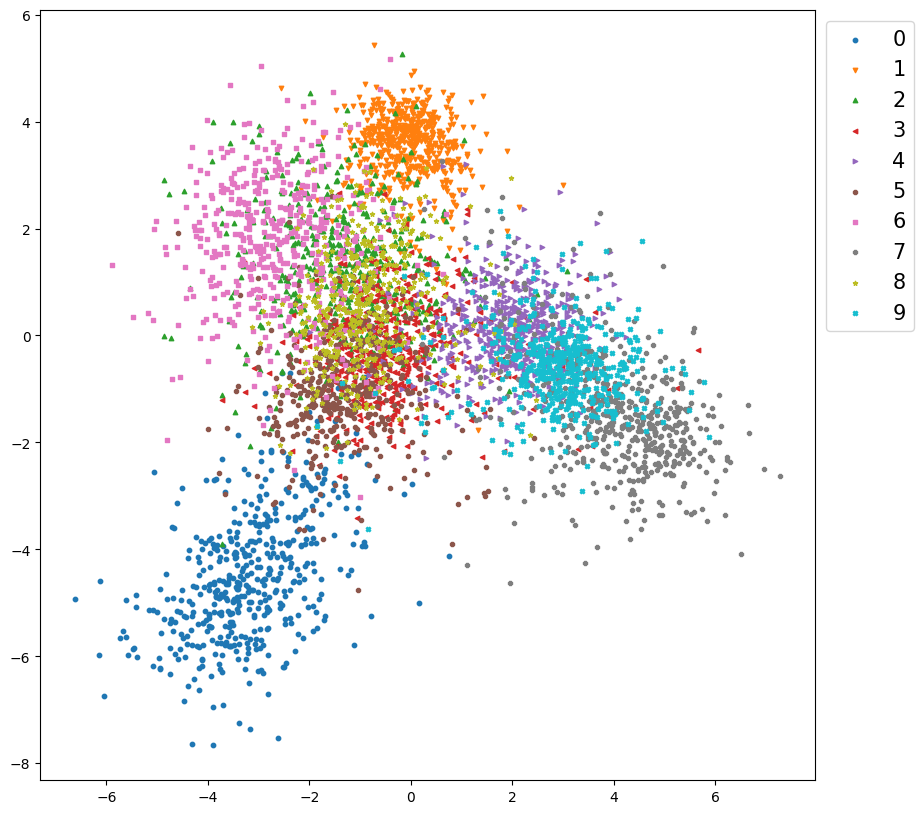

In [12]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=2)
x_lda = lda.fit_transform(train_x, train_y)

plt.figure(figsize=(10,10))
for i,marker in enumerate(markers):
    mask = train_y == i
    plt.scatter(x_lda[mask, 0], x_lda[mask, 1], label=i, s=10, alpha=1,marker=marker)
plt.legend(bbox_to_anchor=(1.00, 1), loc='upper left',fontsize=15)

L'Analyse Discriminante Linéaire (LDA) présente plusieurs limites, qui peuvent influencer son efficacité dans certaines situations. Voici les principales limitations de LDA :

### 1. **Hypothèse de Normalité**
   - **Description** : LDA suppose que les caractéristiques de chaque classe suivent une distribution normale multivariée.
   - **Limite** : Si les données ne respectent pas cette hypothèse de normalité, les résultats de LDA peuvent être biaisés, entraînant des erreurs de classification. En effet, les distributions des classes pourraient être asymétriques ou déformées, ce qui nuit à la performance du modèle.

### 2. **Homogénéité des Variances**
   - **Description** : LDA suppose également que les différentes classes partagent la même matrice de covariance (c'est-à-dire que la variance est homogène entre les classes).
   - **Limite** : Si les classes ont des variances différentes, cela peut entraîner des problèmes de classification. Les classes peuvent être mal séparées dans l'espace projeté, ce qui affecte la précision du modèle.

### 3. **Limitation au Nombre de Classes**
   - **Description** : LDA fonctionne mieux lorsque le nombre de classes est relativement faible par rapport au nombre d'observations.
   - **Limite** : Lorsque le nombre de classes est très élevé par rapport à la taille de l'échantillon, LDA peut devenir moins efficace car il pourrait y avoir trop peu de données pour estimer correctement les matrices de covariance pour chaque classe.

### 4. **Sensible aux Outliers**
   - **Description** : LDA peut être influencé par les valeurs aberrantes (outliers) dans les données.
   - **Limite** : Les outliers peuvent fausser les estimations des moyennes et des variances, ce qui peut nuire à la qualité de la classification. Les classes peuvent être mal définies en raison de la présence de ces valeurs extrêmes.

### 5. **Non-linéarité**
   - **Description** : LDA est une méthode linéaire qui ne peut capturer que des relations linéaires entre les variables.
   - **Limite** : Si les classes dans les données ont des frontières non linéaires, LDA peut ne pas être en mesure de les séparer efficacement. Dans de tels cas, d'autres méthodes, comme les arbres de décision ou les SVM (machines à vecteurs de support) avec noyau, pourraient être plus adaptées.

### 6. **Perte d'information**
   - **Description** : Lors de la réduction de dimension, LDA projette les données sur un espace de caractéristiques réduit.
   - **Limite** : Cette projection peut entraîner une perte d'information importante, surtout si les composantes projetées ne représentent pas bien la structure sous-jacente des données. Cela peut réduire la performance du modèle de classification.


---

## t-SNE (t-Distributed Stochastic Neighbor Embedding)


Le t-SNE (t-Distributed Stochastic Neighbor Embedding) est une méthode de réduction de dimension non linéaire principalement utilisée pour **visualiser** des données multidimensionnelles complexes en les projetant dans un espace de faible dimension, généralement en **2D** ou **3D**. Son objectif est de conserver la **proximité locale** entre les points dans l'espace original tout en les représentant de manière cohérente dans l'espace réduit.

### Étapes de t-SNE et le "Pourquoi" derrière chaque étape

#### 1. **Calcul des probabilités de voisinage dans l'espace d'origine**
   - **Pourquoi ?** : Dans l'espace de haute dimension, t-SNE calcule une probabilité de proximité entre chaque paire de points. Ces probabilités sont basées sur la distance euclidienne entre les points, converties en probabilités via une distribution gaussienne (ou normale). Cela permet de capturer à quel point deux points sont proches dans l'espace d'origine.
   - **Comment ?** : Pour chaque point, t-SNE utilise une distribution gaussienne centrée sur ce point pour estimer les probabilités. Plus les points sont proches, plus la probabilité est élevée.

#### 2. **Calcul des probabilités dans l'espace de faible dimension**
   - **Pourquoi ?** : t-SNE cherche à conserver la relation de voisinage dans l'espace réduit. Pour ce faire, il définit une distribution de probabilité entre les points dans l'espace à faible dimension (2D ou 3D). Cette fois, t-SNE utilise une distribution en forme de "t de Student", qui a des queues plus larges que la gaussienne. Cela permet de mieux gérer la répartition des distances lorsque les points sont éloignés les uns des autres.
   - **Comment ?** : Les distances dans l'espace réduit sont converties en probabilités avec la distribution t de Student, ce qui est plus efficace pour capturer les relations non linéaires et éviter que les points éloignés influencent trop la disposition des points proches.

#### 3. **Minimisation de la divergence KL (Kullback-Leibler)**
   - **Pourquoi ?** : L'objectif de t-SNE est de minimiser la divergence de Kullback-Leibler (KL divergence) entre les distributions de probabilité de l'espace original (haute dimension) et celles de l'espace projeté (basse dimension). La divergence KL mesure la différence entre deux distributions de probabilité, donc minimiser cette valeur signifie que les relations de proximité des points dans l'espace de faible dimension sont aussi similaires que possible à celles de l'espace de haute dimension.
   - **Comment ?** : t-SNE ajuste les positions des points dans l'espace réduit pour minimiser la divergence KL, en utilisant des méthodes d'optimisation comme la descente de gradient. L'idée est de s'assurer que si deux points étaient proches dans l'espace d'origine, ils le restent dans l'espace réduit.

#### 4. **Itération et ajustement progressif**
   - **Pourquoi ?** : t-SNE est un algorithme itératif, ce qui signifie qu'il ajuste progressivement les positions des points dans l'espace réduit à chaque itération. L'optimisation continue jusqu'à ce que la divergence KL soit minimisée ou qu'un certain nombre d'itérations soit atteint.
   - **Comment ?** : Chaque itération ajuste les points pour mieux refléter les relations de voisinage, en déplaçant les points en fonction de la différence entre les distributions dans les deux espaces.

### Limites de t-SNE

Malgré sa puissance pour la visualisation, t-SNE présente plusieurs **limites** importantes :

#### 1. **Coût de calcul élevé**
   - t-SNE est très coûteux en termes de calcul, surtout pour de grands jeux de données, car il doit calculer les distances entre toutes les paires de points et effectuer de nombreuses itérations pour minimiser la divergence KL. Pour des jeux de données de grande taille, le temps de calcul peut être prohibitif.

#### 2. **Sensibilité aux hyperparamètres**
   - t-SNE est sensible à certains hyperparamètres, comme le **perplexity**, qui influence la taille des voisinages considérés lors du calcul des probabilités. Le choix de ce paramètre peut grandement affecter les résultats, et il n'y a pas de règle universelle pour le définir correctement.

#### 3. **Difficulté à interpréter les distances globales**
   - t-SNE est principalement conçu pour préserver les distances **locales** entre les points. Cela signifie que les distances **globales** (entre des points très éloignés) dans l'espace projeté ne sont pas fiables. Il ne faut donc pas interpréter les grandes distances comme significatives.

#### 4. **Réduction à 2D ou 3D uniquement**
   - t-SNE est principalement utilisé pour des projections en deux ou trois dimensions. Lorsqu'il est utilisé pour réduire les dimensions à plus de trois dimensions, il devient moins efficace et son utilité diminue rapidement.

#### 5. **Non-déterminisme**
   - t-SNE est un algorithme non déterministe, ce qui signifie qu'à chaque exécution, les résultats peuvent être légèrement différents, même avec les mêmes paramètres. Cela peut poser des problèmes si une visualisation cohérente est nécessaire.

### Conclusion

t-SNE est un outil puissant pour **visualiser** des jeux de données complexes en réduisant leur dimensionnalité tout en préservant les relations locales. Cependant, il présente des **limitations**, notamment en termes de **coût de calcul**, de **sensibilité aux paramètres** et de **difficulté d'interprétation des distances globales**. Il reste néanmoins l'un des meilleurs choix pour visualiser des données à haute dimension de manière intuitive, surtout dans le cadre de la recherche de structures cachées dans les données.

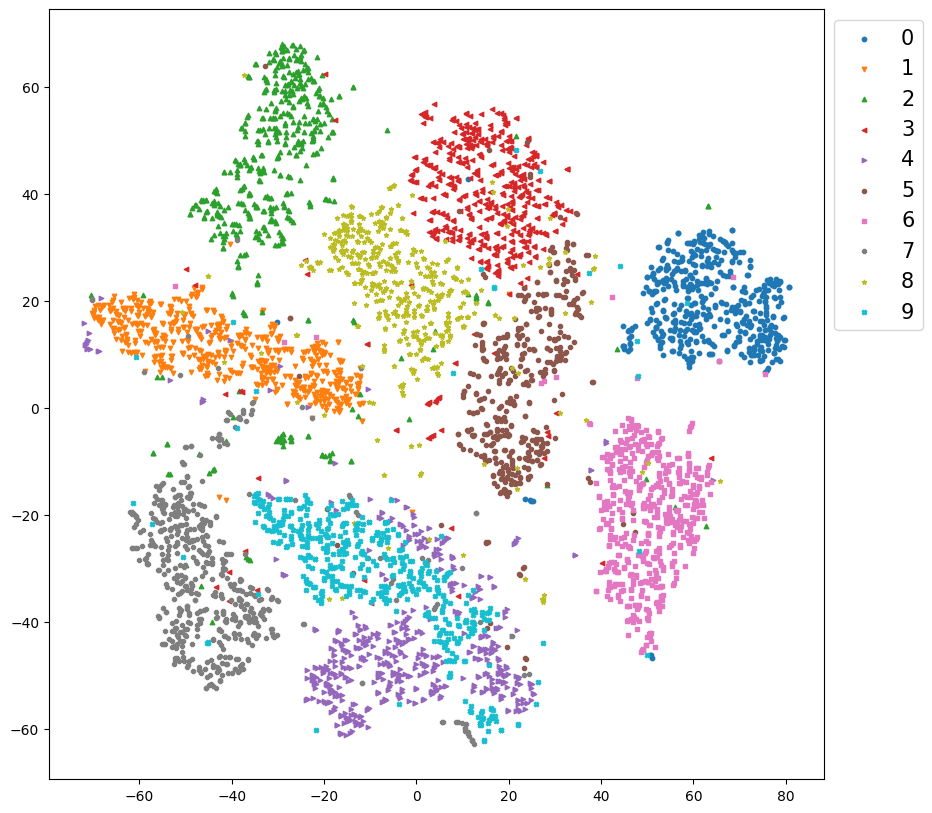

In [13]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)
x_tsne = tsne.fit_transform(train_x)

plt.figure(figsize=(10,10))
for i,marker in enumerate(markers):
    mask = train_y == i
    plt.scatter(x_tsne[mask, 0], x_tsne[mask, 1], label=i, s=10, alpha=1,marker=marker)
plt.legend(bbox_to_anchor=(1.00, 1), loc='upper left',fontsize=15)

### **UMAP** (Uniform Manifold Approximation and Projection)

**UMAP** est une méthode de réduction de dimension, comme le t-SNE, principalement utilisée pour la **visualisation** et l'exploration des données. UMAP se distingue par sa capacité à conserver à la fois la structure locale et globale des données, tout en étant plus **rapide** et **scalable** que le t-SNE. Il est fondé sur des théories de géométrie et topologie, en particulier la théorie des variétés et la réduction des dimensions de l'espace de données par projection sur un espace de dimension inférieure.

### Étapes de UMAP et le "Pourquoi" derrière chaque étape

#### 1. **Construction du graphe des voisins locaux**
   - **Pourquoi ?** : UMAP commence par construire un graphe de voisinage où chaque point est relié à ses voisins les plus proches dans l'espace de haute dimension. Cette étape capture la **structure locale** des données et est essentielle pour comprendre les relations proches entre les points.
   - **Comment ?** : Le nombre de voisins à considérer est déterminé par l'hyperparamètre **nombre de voisins** (*n_neighbors*). Un plus petit nombre de voisins mettra davantage l'accent sur la structure locale, tandis qu'un plus grand nombre préservera mieux la structure globale.

#### 2. **Construction d'un espace topologique (manifold)**
   - **Pourquoi ?** : UMAP présume que les données résident sur une **variété** (ou manifold) de dimension inférieure plongée dans un espace de haute dimension. Cette étape permet de modéliser la structure des données en termes topologiques et géométriques. L'idée est de créer une structure où les relations locales et globales peuvent être conservées.
   - **Comment ?** : UMAP utilise la théorie de la réduction de variété pour définir une structure géométrique et des probabilités de connexions entre les points dans l'espace original. Les distances entre les points proches dans cet espace représentent mieux la "vraie" relation dans l'espace original de haute dimension.

#### 3. **Optimisation par projection dans l'espace réduit**
   - **Pourquoi ?** : Une fois l'espace topologique défini, UMAP projette les points dans un espace de plus faible dimension (généralement 2D ou 3D), en maintenant les relations locales tout en réduisant la dimension. L'objectif est de minimiser la différence entre le graphe des voisins de l'espace original et celui de l'espace réduit.
   - **Comment ?** : Cette optimisation repose sur une fonction de coût qui ajuste les positions des points projetés pour préserver les distances locales définies dans l'étape précédente. UMAP utilise un algorithme basé sur la descente de gradient pour ajuster ces positions.

#### 4. **Itération et convergence**
   - **Pourquoi ?** : Comme t-SNE, UMAP est un algorithme itératif. À chaque itération, il affine la projection pour mieux conserver la structure locale et globale des données. L'optimisation se poursuit jusqu'à ce que le modèle converge vers une solution stable.
   - **Comment ?** : Le processus d'optimisation est répétitif, et les positions des points sont ajustées jusqu'à ce que les relations locales et globales entre les points soient bien représentées dans l'espace de faible dimension.

### Limites de UMAP

Bien que UMAP offre des avantages notables, notamment en termes de rapidité et de conservation de la structure globale, il présente aussi des limites :

#### 1. **Dépendance aux hyperparamètres**
   - **Description** : UMAP est sensible aux choix des hyperparamètres, tels que le nombre de voisins (**n_neighbors**) et la distance minimale (**min_dist**). Ces paramètres influencent la manière dont UMAP équilibre la conservation des structures locales par rapport aux structures globales.
   - **Limite** : Un choix inadéquat de ces paramètres peut entraîner une perte d'information importante ou un modèle qui ne capture pas correctement la structure sous-jacente des données.

#### 2. **Moins performant pour des données de très faible dimension**
   - **Description** : UMAP est conçu pour des données de haute dimension et est plus efficace lorsque les données résident sur une variété complexe. Pour des données de faible dimension, UMAP pourrait ne pas offrir d'avantages significatifs par rapport à des techniques plus simples comme l'ACP (PCA).
   - **Limite** : Dans des espaces de très faible dimension, les techniques linéaires ou d'autres méthodes pourraient être plus adaptées.

#### 3. **Non-déterminisme**
   - **Description** : Comme t-SNE, UMAP est **non déterministe**, ce qui signifie que les résultats peuvent varier à chaque exécution, même avec les mêmes paramètres, en raison de l'initialisation aléatoire.
   - **Limite** : Cela peut poser un problème si l'on cherche une visualisation cohérente et stable des données.

#### 4. **Non-optimisation pour les petites structures locales**
   - **Description** : UMAP, bien qu'excellent pour capturer la structure globale des données, peut parfois mal représenter des sous-structures locales très complexes ou des clusters denses si les paramètres ne sont pas bien ajustés.
   - **Limite** : La précision sur de très petits clusters ou sur des relations très locales peut être sacrifiée en faveur de la conservation de la structure globale.

#### 5. **Difficulté d'interprétation**
   - **Description** : Comme t-SNE, UMAP est principalement une méthode **non linéaire** de réduction de dimension et est conçue pour la **visualisation**. Cela signifie qu'il peut être difficile d'interpréter les résultats, en particulier en termes de distances entre les points dans l'espace projeté.
   - **Limite** : Les distances dans l'espace réduit ne doivent pas toujours être interprétées comme fidèles, surtout lorsque les points sont éloignés les uns des autres.

### Conclusion

UMAP est une méthode puissante pour la réduction de dimension et la visualisation des données, offrant une **meilleure vitesse** et une **meilleure préservation de la structure globale** que t-SNE. Il est bien adapté aux grands ensembles de données complexes où la structure locale et globale est importante. Cependant, il présente des limites, notamment en ce qui concerne la sensibilité aux hyperparamètres et l'interprétation des distances projetées. Néanmoins, UMAP est un choix populaire pour l'exploration visuelle des données de haute dimension, surtout pour des tâches comme la classification, le clustering, et la recherche de structures cachées.

c:\Users\tariq\Desktop\Dimension-reduction\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning:

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html



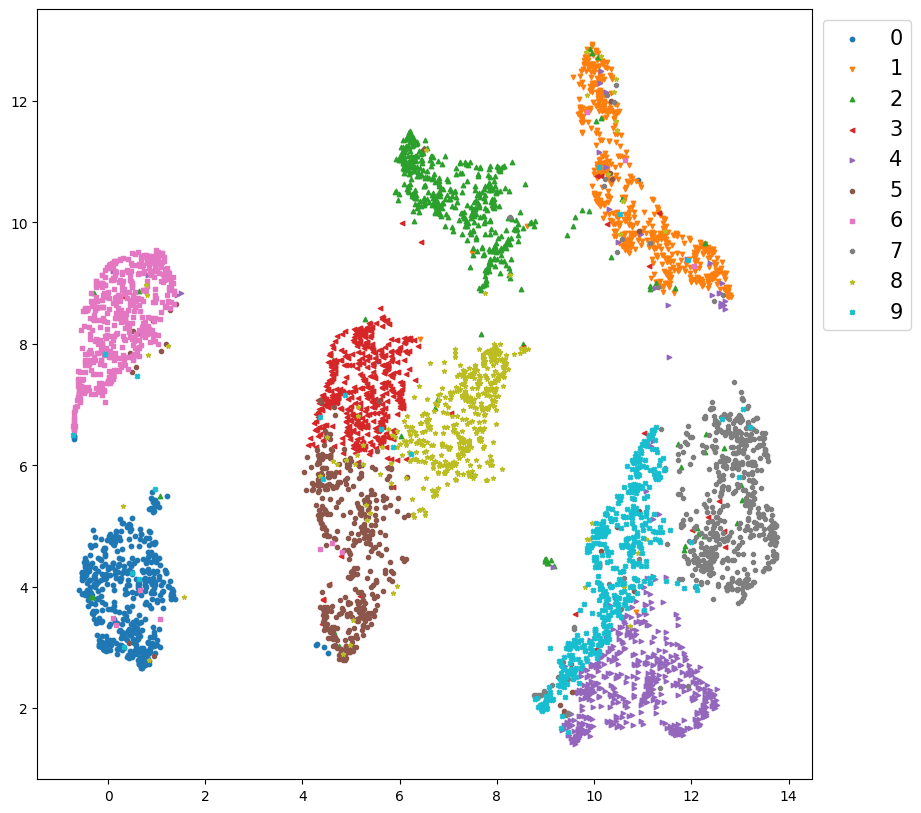

In [19]:
import umap.umap_ as umap

um = umap.UMAP()
x_umap = um.fit_transform(train_x)

plt.figure(figsize=(10,10))
for i,marker in enumerate(markers):
    mask = train_y == i
    plt.scatter(x_umap[mask, 0], x_umap[mask, 1], label=i, s=10, alpha=1,marker=marker)
plt.legend(bbox_to_anchor=(1.00, 1), loc='upper left',fontsize=15)